In [63]:
# speedup of resnet
import pandas as pd

path_ecr = "singleECR.txt"
path_pecr = "batchedECR.txt"

time_ecr = pd.read_csv(path_ecr, header = None, dtype = float)
time_pecr = pd.read_csv(path_pecr, header = None, dtype = float)

time_ocpa_ecr = []
time_ocpa_pecr = []
for i in range(0, 16):
    time_ocpa_ecr.append(time_ecr.iat[i, 0])
for i in range(0,16):
    time_ocpa_pecr.append(time_pecr.iat[i, 0])

In [64]:
path_cu_gemm = "cuDNN_gemm.txt"
path_cu_imp = "cuDNN_imp_gemm.txt"
path_cu_fft = "cuDNN_fft.txt"

time_gemm = pd.read_csv(path_cu_gemm, header=None, dtype=float)
time_imp = pd.read_csv(path_cu_imp, header=None, dtype=float)
time_fft = pd.read_csv(path_cu_fft, header=None, dtype=float)

time_cudnn_gemm = []
time_cudnn_imp = []
time_cudnn_fft = []

for i in range(0, 16):
    time_cudnn_gemm.append(time_gemm.iat[i, 0])
for i in range(0, 16):
    time_cudnn_imp.append(time_imp.iat[i, 0])
for i in range(0, 16):
    time_cudnn_fft.append(time_fft.iat[i, 0])


print("CUDNN GEMM")
print(time_cudnn_gemm)
print("CUDNN IMPLICIT GEMM")
print(time_cudnn_imp)
print("CUDNN FFT")
print(time_cudnn_fft)

CUDNN GEMM
[0.659872, 0.676992, 0.561824, 0.568768, 0.533984, 0.518592, 0.547392, 0.613376, 0.527296, 0.573536, 0.528928, 0.544672, 0.583424, 0.522496, 0.513344, 0.515296]
CUDNN IMPLICIT GEMM
[0.656512, 0.668704, 0.644448, 0.722272, 0.634304, 0.547392, 1.07571, 0.754112, 0.518688, 0.549088, 0.5488, 0.55536, 0.594304, 0.541248, 0.551872, 0.624672]
CUDNN FFT
[1.53766, 1.45078, 0.823168, 0.811392, 0.5984, 0.584672, 0.640544, 0.604992, 0.540768, 0.674496, 0.549888, 0.601216, 0.549024, 0.5992, 0.561536, 0.648928]


In [65]:
times_cudnn_gemm_vs_ecr = []
times_cudnn_imp_vs_ecr = []
times_cudnn_fft_vs_ecr = []

times_cudnn_gemm_vs_pecr = []
times_cudnn_imp_vs_pecr = []
times_cudnn_fft_vs_pecr = []

for i in range(0, 16):
    times_cudnn_gemm_vs_ecr.append(time_cudnn_gemm[i]/time_ocpa_ecr[i])
    times_cudnn_gemm_vs_pecr.append(time_cudnn_gemm[i]/time_ocpa_pecr[i])

for i in range(0,16):
    times_cudnn_imp_vs_ecr.append(time_cudnn_imp[i]/time_ocpa_ecr[i])
    times_cudnn_imp_vs_pecr.append(time_cudnn_imp[i]/time_ocpa_pecr[i])

for i in range(0, 16):
    times_cudnn_fft_vs_ecr.append(time_cudnn_fft[i]/time_ocpa_ecr[i])
    times_cudnn_fft_vs_pecr.append(time_cudnn_fft[i]/time_ocpa_pecr[i])

print("SPEED UP VALUES OF ECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_ecr)
print("SPEED UP VALUES OF ECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_ecr)

print("SPEED UP VALUES OF PECR OVER CUDNN GEMM")
print(times_cudnn_gemm_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN IMPLICIT GEMM")
print(times_cudnn_imp_vs_pecr)
print("SPEED UP VALUES OF PECR OVER CUDNN FFT")
print(times_cudnn_fft_vs_pecr)

SPEED UP VALUES OF ECR OVER CUDNN GEMM
[2.19559199318569, 2.0478172490562385, 2.2103739141382346, 2.309211381057555, 3.037313432835821, 2.9503003823047522, 3.0832732516222063, 3.3504632057332633, 3.093298291721419, 3.4876435104105856, 3.2691851265822782, 3.2980042627397794, 3.7064443992681446, 3.2122762148337594, 3.035957607872824, 2.725626269465132]
SPEED UP VALUES OF ECR OVER CUDNN IMPLICIT GEMM
[2.184412265758092, 2.022747071919466, 2.535440010071761, 2.932441210861375, 3.60793593010557, 3.114145275805571, 6.059109138428262, 4.119209928334207, 3.0428008259808523, 3.3389764545631446, 3.392009493670886, 3.36272040302267, 3.7755641390526535, 3.327562463112335, 3.2638152914458747, 3.30416384563304]
SPEED UP VALUES OF ECR OVER CUDNN FFT
[5.116255856047701, 4.388430452037557, 3.238574845776155, 3.2942704949980515, 3.4037131416090283, 3.3262333879482977, 3.607966834895458, 3.304667016255899, 3.172329641449221, 4.101576182136602, 3.39873417721519, 3.6403797713621393, 3.487904045537711, 3.68

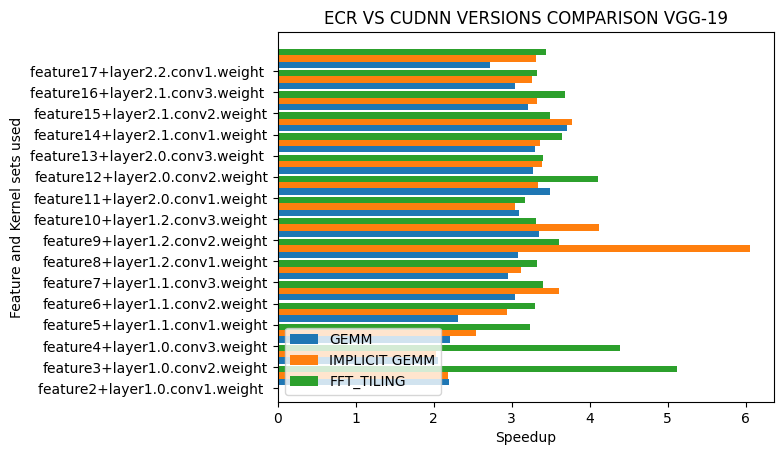

In [66]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_ecr[:16],  height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_ecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_ecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("ECR VS CUDNN VERSIONS COMPARISON VGG-19")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()

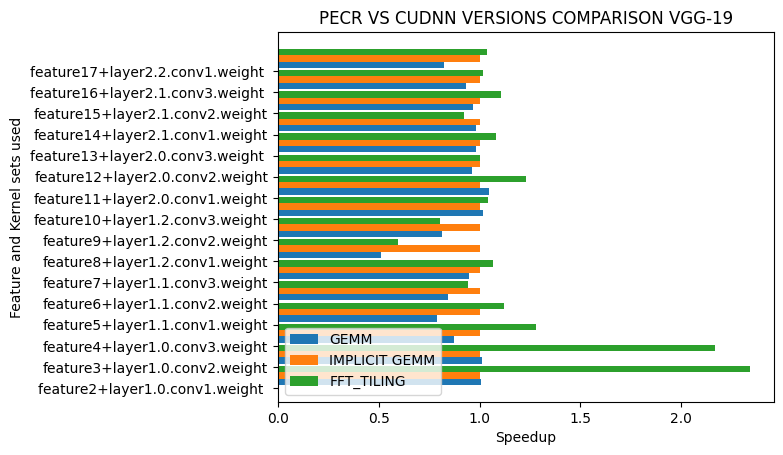

In [67]:
import numpy as np
import matplotlib.pyplot as plt 

x_axis = np.arange(16)
feature_and_kernels_used = ["feature2+layer1.0.conv1.weight ","feature3+layer1.0.conv2.weight",
"feature4+layer1.0.conv3.weight",
"feature5+layer1.1.conv1.weight",
"feature6+layer1.1.conv2.weight",
"feature7+layer1.1.conv3.weight",
"feature8+layer1.2.conv1.weight",
"feature9+layer1.2.conv2.weight",
"feature10+layer1.2.conv3.weight",
"feature11+layer2.0.conv1.weight",
"feature12+layer2.0.conv2.weight",
"feature13+layer2.0.conv3.weight ",
"feature14+layer2.1.conv1.weight",
"feature15+layer2.1.conv2.weight",
"feature16+layer2.1.conv3.weight ",
"feature17+layer2.2.conv1.weight "]

# Horizontal bar charts
plt.barh(x_axis+0.30, times_cudnn_gemm_vs_pecr[:16], height=0.3, label="GEMM")
plt.barh(x_axis+0.30*2, times_cudnn_imp_vs_pecr[:16], height=0.3, label="IMPLICIT GEMM")
plt.barh(x_axis+0.30*3, times_cudnn_fft_vs_pecr[:16], height=0.3, label="FFT_TILING")

# yticks
plt.yticks(x_axis, feature_and_kernels_used)


# add ylabel and xlabel
plt.title("PECR VS CUDNN VERSIONS COMPARISON VGG-19")
plt.ylabel("Feature and Kernel sets used")
plt.xlabel("Speedup")

# add legend 
plt.legend(loc=3)
# display chart
plt.show()